In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df=pd.read_csv("Nashville_housing_data_2013_2016.csv")
# df

In [2]:
data = pd.read_csv('Nashville_housing_data_2013_2016.csv')
data

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# test for duplicates
print(data.duplicated().value_counts())

False    56636
Name: count, dtype: int64


In [4]:
# detect missing values
# total values in each column
data.isnull().sum()

Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

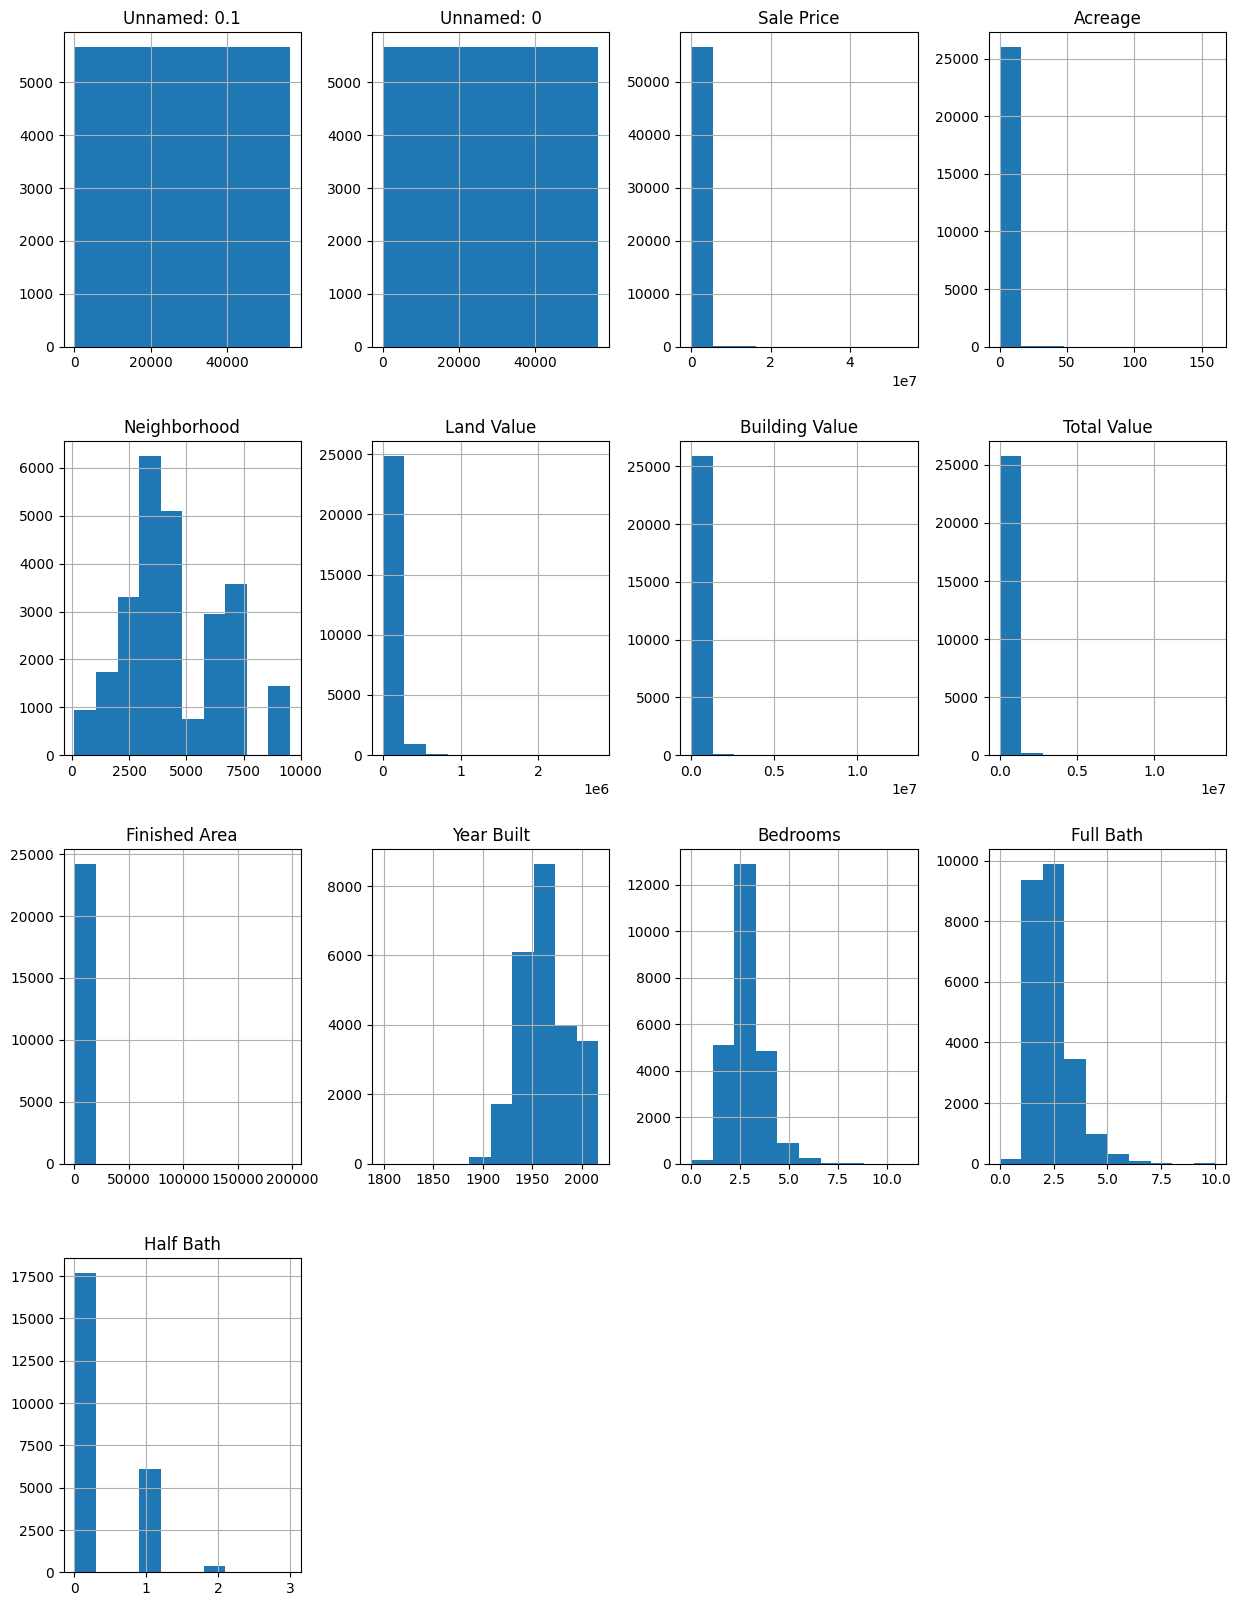

In [5]:
# visualizing data by histograms
data.hist(figsize=(15,20))
plt.show()

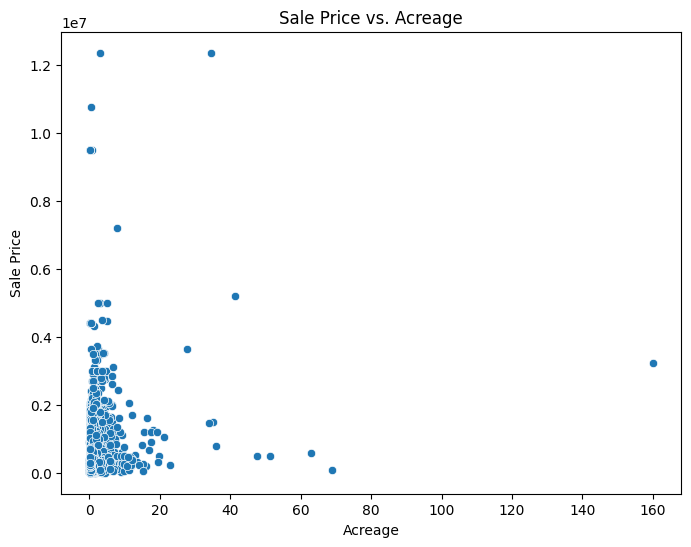

In [6]:
# Scatter plot for Sale Price vs. Acreage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acreage', y='Sale Price', data=data)
plt.title('Sale Price vs. Acreage')
plt.xlabel('Acreage')
plt.ylabel('Sale Price')
plt.show()

In [7]:
# Get the top 10 land use categories
top_land_use = data['Land Use'].value_counts().nlargest(10)

# Print the top 10 land use categories
print("Top 10 Land Use Categories:")
print(top_land_use)


Top 10 Land Use Categories:
Land Use
SINGLE FAMILY              34268
RESIDENTIAL CONDO          14081
VACANT RESIDENTIAL LAND     3586
VACANT RES LAND             1575
DUPLEX                      1389
ZERO LOT LINE               1049
CONDO                        252
RESIDENTIAL COMBO/MISC        95
TRIPLEX                       92
QUADPLEX                      39
Name: count, dtype: int64


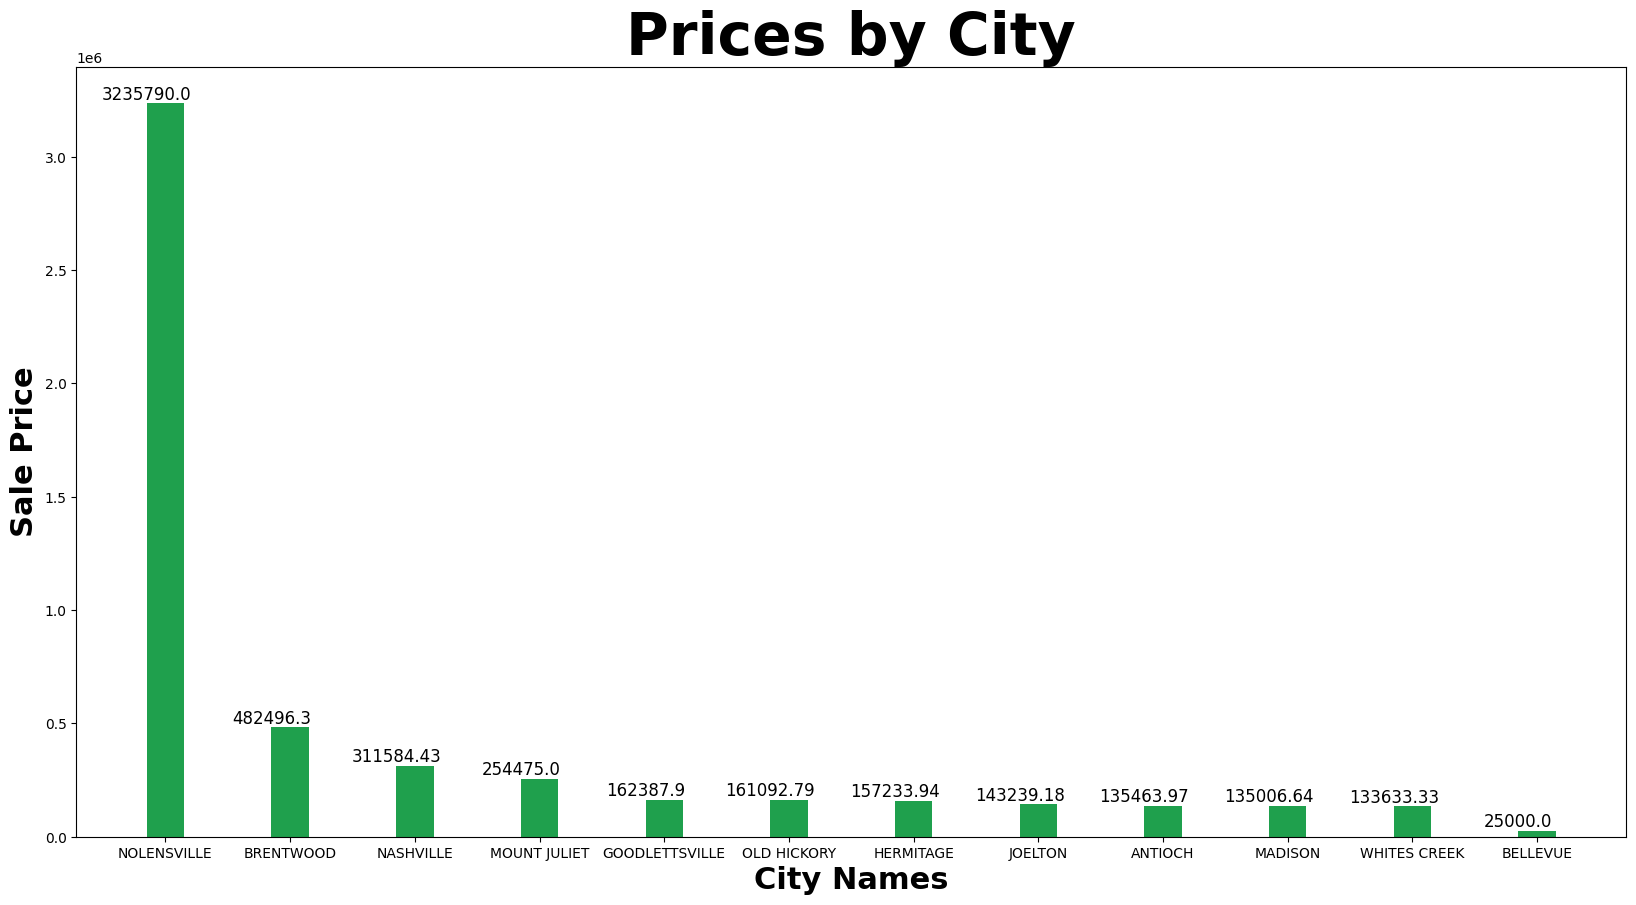

In [51]:
city_avg_prices = data.groupby('City')['Sale Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
bars = plt.bar(x=city_avg_prices.index, height=city_avg_prices.values, width=0.3, color='#1fa04d')


plt.xlabel("City Names",fontdict={'fontsize': 22,'fontweight':"bold"})
plt.ylabel("Sale Price",fontdict={'fontsize': 22,'fontweight':"bold"})
plt.title("Prices by City",fontdict={'fontsize': 42,'fontweight':"bold"})
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.show() 
